In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the Universal bank data

bankdata = pd.read_csv(r"D:\00 Datasets\Bank\Universalbank.csv", header=0)

# Copy to back-up files

bankdata_bk = bankdata.copy()

# Display first 5 records

bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Displaying the dataset information

bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

CreditCard_count = bankdata.CreditCard.value_counts()
print('Class 0:', CreditCard_count[0])
print('Class 1:', CreditCard_count[1])
print('Proportion:', round(CreditCard_count[0] / CreditCard_count[1], 2), ': 1')
print('Total Bank records:', len(bankdata))

Class 0: 3530
Class 1: 1470
Proportion: 2.4 : 1
Total Bank records: 5000


In [5]:
# Delete the columns which are not influencing the target variable

del bankdata['ID']
del bankdata['ZIP Code']

In [6]:
# Displaying the dataset columns

bankdata.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [ ]:
# cols1 is variables - crating a dummy variables

#cols1 = ['Family', 'Education']
#print(cols1)

In [7]:
# Display 'Education' categorical variable 

bankdata['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [8]:
# Display 'Family' categorical variable 

bankdata['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [9]:
# cols2 variables - MinMaxScalar function

cols2 = ['Age', 'Experience', 'Income', 'Family', 'Education', 'CCAvg', 'Mortgage']
print(cols2)

['Age', 'Experience', 'Income', 'Family', 'Education', 'CCAvg', 'Mortgage']


In [ ]:
# Create dummy variable for all range values

#bankdata = pd.get_dummies(bankdata, columns=cols1)
#bankdata.head().T

In [10]:
# Identify the independent and Target variables

IndepVar = []
for col in bankdata.columns:
    if col != 'CreditCard':
        IndepVar.append(col)

TargetVar = 'CreditCard'

x = bankdata[IndepVar]
y = bankdata[TargetVar]

In [11]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the train and test data sizes

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 11), (1500, 11), (3500,), (1500,))

In [12]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols2] = mmscaler.fit_transform(x_train[cols2])
x_train = pd.DataFrame(x_train)

x_test[cols2] = mmscaler.fit_transform(x_test[cols2])
x_test = pd.DataFrame(x_test)

In [13]:
# Load the results dataset

EMResults = pd.read_csv(r"D:\R3SPAnalytics\01-SDP\Datasets\Results\EMResults.csv", header=0)

# Display the first 5 records

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM - Linear Kernel

Model Name:  SVM - Linear
Confusion matrix : 
 [[  71  356]
 [  20 1053]]
Outcome values : 
 71 356 20 1053
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.17      0.27       427
           0       0.75      0.98      0.85      1073

    accuracy                           0.75      1500
   macro avg       0.76      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500

Accuracy : 74.9 %
Precision : 78.0 %
Recall : 16.6 %
F1 Score : 0.274
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 57.4 %
MCC : 0.279
roc_auc_score: 0.574


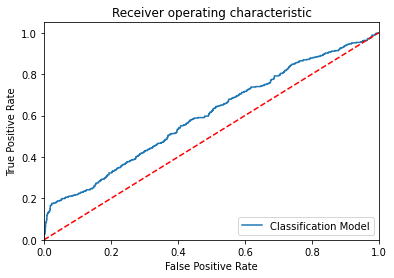

-----------------------------------------------------------------------------------------------------


In [14]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

bankdataSVM = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                  probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                  max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

bankdataSVM = bankdataSVM.fit(x_train, y_train)

# Predict the model with test data set

y_pred = bankdataSVM.predict(x_test)
y_pred_prob = bankdataSVM.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,bankdataSVM.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#---

In [15]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,71,356,20,1053,0.749,0.78,0.166,0.274,0.981,0.279,0.573819,0.574


# Polynomial Kernel

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[  68  359]
 [   8 1065]]
Outcome values : 
 68 359 8 1065
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.16      0.27       427
           0       0.75      0.99      0.85      1073

    accuracy                           0.76      1500
   macro avg       0.82      0.58      0.56      1500
weighted avg       0.79      0.76      0.69      1500

Accuracy : 75.5 %
Precision : 89.5 %
Recall : 15.9 %
F1 Score : 0.27
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 57.6 %
MCC : 0.312
roc_auc_score: 0.576


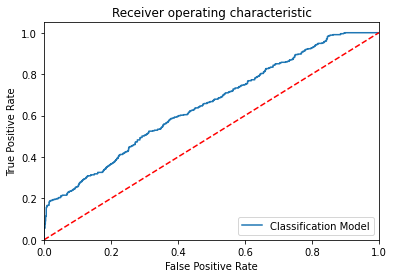

-----------------------------------------------------------------------------------------------------


In [16]:
# Training the SVM algorithm

from sklearn.svm import SVC

bankdataSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

bankdataSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = bankdataSVMPoly.predict(x_test)
y_pred_prob = bankdataSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,bankdataSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#---

In [17]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,71,356,20,1053,0.749,0.780,0.166,0.274,0.981,0.279,0.573819,0.574
1,SVM - Polynominal,68,359,8,1065,0.755,0.895,0.159,0.270,0.993,0.312,0.575897,0.576


# Gaussian Kernel

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[164 263]
 [291 782]]
Outcome values : 
 164 263 291 782
Classification report : 
               precision    recall  f1-score   support

           1       0.36      0.38      0.37       427
           0       0.75      0.73      0.74      1073

    accuracy                           0.63      1500
   macro avg       0.55      0.56      0.56      1500
weighted avg       0.64      0.63      0.63      1500

Accuracy : 63.1 %
Precision : 36.0 %
Recall : 38.4 %
F1 Score : 0.372
Specificity or True Negative Rate : 72.9 %
Balanced Accuracy : 55.6 %
MCC : 0.111
roc_auc_score: 0.556


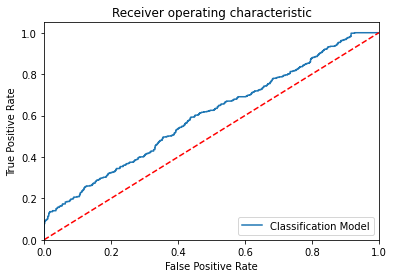

-----------------------------------------------------------------------------------------------------


In [18]:
# Training the SVM algorithm

from sklearn.svm import SVC

bankdataSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

bankdataSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = bankdataSVMGaussian.predict(x_test)
y_pred_prob = bankdataSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,bankdataSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#---

In [19]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,71,356,20,1053,0.749,0.780,0.166,0.274,0.981,0.279,0.573819,0.574
1,SVM - Polynominal,68,359,8,1065,0.755,0.895,0.159,0.270,0.993,0.312,0.575897,0.576
2,SVM - Gaussian,164,263,291,782,0.631,0.360,0.384,0.372,0.729,0.111,0.556436,0.556


# Sigmoid Kernel

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[224 203]
 [489 584]]
Outcome values : 
 224 203 489 584
Classification report : 
               precision    recall  f1-score   support

           1       0.31      0.52      0.39       427
           0       0.74      0.54      0.63      1073

    accuracy                           0.54      1500
   macro avg       0.53      0.53      0.51      1500
weighted avg       0.62      0.54      0.56      1500

Accuracy : 53.9 %
Precision : 31.4 %
Recall : 52.5 %
F1 Score : 0.393
Specificity or True Negative Rate : 54.4 %
Balanced Accuracy : 53.4 %
MCC : 0.062
roc_auc_score: 0.534


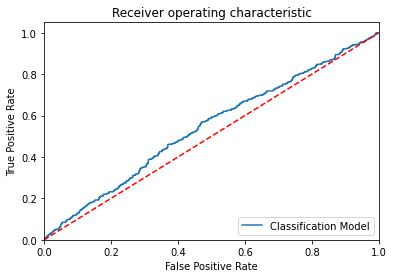

-----------------------------------------------------------------------------------------------------


In [20]:
# Training the SVM algorithm

from sklearn.svm import SVC

bankdataSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

bankdataSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = bankdataSVMSig.predict(x_test)
y_pred_prob = bankdataSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,bankdataSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#---

In [21]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,71,356,20,1053,0.749,0.780,0.166,0.274,0.981,0.279,0.573819,0.574
1,SVM - Polynominal,68,359,8,1065,0.755,0.895,0.159,0.270,0.993,0.312,0.575897,0.576
2,SVM - Gaussian,164,263,291,782,0.631,0.360,0.384,0.372,0.729,0.111,0.556436,0.556
3,SVM - Sigmoid,224,203,489,584,0.539,0.314,0.525,0.393,0.544,0.062,0.534429,0.534


# Run the SVM algorithm as one step

Model Name:  SVC(kernel='linear', probability=True)
Confusion matrix : 
 [[  71  356]
 [  20 1053]]
Outcome values : 
 71 356 20 1053
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.17      0.27       427
           0       0.75      0.98      0.85      1073

    accuracy                           0.75      1500
   macro avg       0.76      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500

Accuracy : 74.9 %
Precision : 78.0 %
Recall : 16.6 %
F1 Score : 0.274
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 57.4 %
MCC : 0.279
roc_auc_score: 0.574


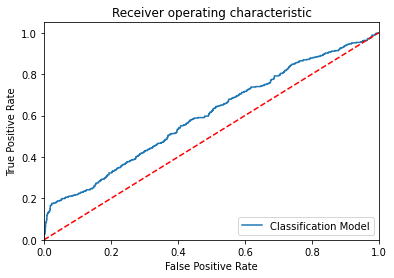

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(degree=2, kernel='poly', probability=True)
Confusion matrix : 
 [[  68  359]
 [   8 1065]]
Outcome values : 
 68 359 8 1065
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.16      0.27       427
           0       0.75      0.99      0.85      1073

    accuracy                           0.76      1500
   macro avg       0.82      0.58      0.56      1500
weighted avg       0.79      0.76      0.69      1500

Accuracy : 75.5 %
Precision : 89.5 %
Recall : 15.9 %
F1 Score : 0.27
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 57.6 %
MCC : 0.312
roc_auc_score: 0.576


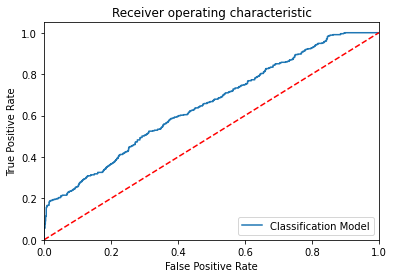

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[164 263]
 [291 782]]
Outcome values : 
 164 263 291 782
Classification report : 
               precision    recall  f1-score   support

           1       0.36      0.38      0.37       427
           0       0.75      0.73      0.74      1073

    accuracy                           0.63      1500
   macro avg       0.55      0.56      0.56      1500
weighted avg       0.64      0.63      0.63      1500

Accuracy : 63.1 %
Precision : 36.0 %
Recall : 38.4 %
F1 Score : 0.372
Specificity or True Negative Rate : 72.9 %
Balanced Accuracy : 55.6 %
MCC : 0.111
roc_auc_score: 0.556


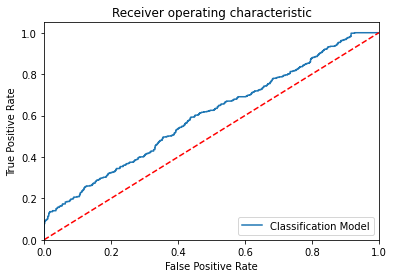

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='sigmoid', probability=True,
    random_state=42)
Confusion matrix : 
 [[224 203]
 [489 584]]
Outcome values : 
 224 203 489 584
Classification report : 
               precision    recall  f1-score   support

           1       0.31      0.52      0.39       427
           0       0.74      0.54      0.63      1073

    accuracy                           0.54      1500
   macro avg       0.53      0.53      0.51      1500
weighted avg       0.62      0.54      0.56      1500

Accuracy : 53.9 %
Precision : 31.4 %
Recall : 52.5 %
F1 Score : 0.393
Specificity or True Negative Rate : 54.4 %
Balanced Accuracy : 53.4 %
MCC : 0.062
roc_auc_score: 0.534


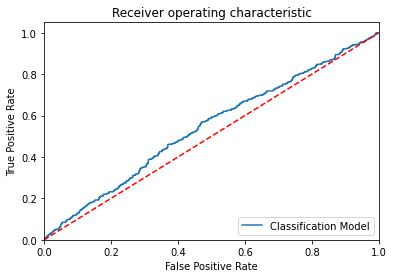

-----------------------------------------------------------------------------------------------------


In [22]:
# Build the all types of SVM Calssification models and compare the results

from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

SVMLIN = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
             probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
             max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

SVMPLY = SVC(kernel='poly', degree=2, probability=True)

SVMGSN = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

SVMSIG = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [SVMLIN, SVMPLY, SVMGSN, SVMSIG]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #---

In [23]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,71,356,20,1053,0.749,0.780,0.166,0.274,0.981,0.279,0.573819,0.574
1,SVM - Polynominal,68,359,8,1065,0.755,0.895,0.159,0.270,0.993,0.312,0.575897,0.576
2,SVM - Gaussian,164,263,291,782,0.631,0.360,0.384,0.372,0.729,0.111,0.556436,0.556
3,SVM - Sigmoid,224,203,489,584,0.539,0.314,0.525,0.393,0.544,0.062,0.534429,0.534
4,"SVC(kernel='linear', probability=True)",71,356,20,1053,0.749,0.780,0.166,0.274,0.981,0.279,0.573819,0.574
5,"SVC(degree=2, kernel='poly', probability=True)",68,359,8,1065,0.755,0.895,0.159,0.270,0.993,0.312,0.575897,0.576
6,"SVC(class_weight='balanced', probability=True,...",164,263,291,782,0.631,0.360,0.384,0.372,0.729,0.111,0.556436,0.556
7,"SVC(class_weight='balanced', kernel='sigmoid',...",224,203,489,584,0.539,0.314,0.525,0.393,0.544,0.062,0.534429,0.534


# Compare the Classification Algorithms

In [27]:
# Load the results dataset

EMResults1 = pd.read_csv(r"D:\R3SPAnalytics\01-SDP\Datasets\Results\EMResults.csv", header=0)

# Display the first 5 records

EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  71  356]
 [  19 1054]]
Outcome values : 
 71 356 19 1054
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.17      0.27       427
           0       0.75      0.98      0.85      1073

    accuracy                           0.75      1500
   macro avg       0.77      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500

Accuracy : 75.0 %
Precision : 78.9 %
Recall : 16.6 %
F1 Score : 0.275
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 57.4 %
MCC : 0.282
roc_auc_score: 0.574


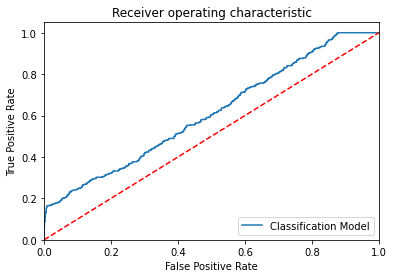

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[171 256]
 [286 787]]
Outcome values : 
 171 256 286 787
Classification report : 
               precision    recall  f1-score   support

           1       0.37      0.40      0.39       427
           0       0.75      0.73      0.74      1073

    accuracy                           0.64      1500
   macro avg       0.56      0.57      0.57      1500
weighted avg       0.65      0.64      0.64      1500

Accuracy : 63.9 %
Precision : 37.4 %
Recall : 40.0 %
F1 Score : 0.387
Specificity or True Negative Rate : 73.3 %
Balanced Accuracy : 56.6 %
MCC : 0.131
roc_auc_score: 0.567


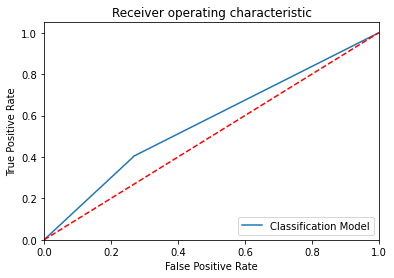

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[112 315]
 [104 969]]
Outcome values : 
 112 315 104 969
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.26      0.35       427
           0       0.75      0.90      0.82      1073

    accuracy                           0.72      1500
   macro avg       0.64      0.58      0.59      1500
weighted avg       0.69      0.72      0.69      1500

Accuracy : 72.1 %
Precision : 51.9 %
Recall : 26.2 %
F1 Score : 0.348
Specificity or True Negative Rate : 90.3 %
Balanced Accuracy : 58.2 %
MCC : 0.213
roc_auc_score: 0.583


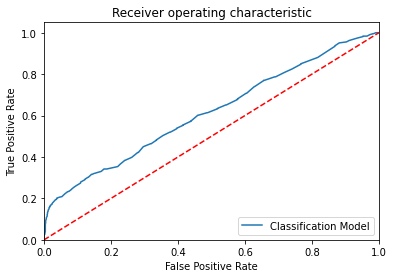

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[122 305]
 [154 919]]
Outcome values : 
 122 305 154 919
Classification report : 
               precision    recall  f1-score   support

           1       0.44      0.29      0.35       427
           0       0.75      0.86      0.80      1073

    accuracy                           0.69      1500
   macro avg       0.60      0.57      0.57      1500
weighted avg       0.66      0.69      0.67      1500

Accuracy : 69.4 %
Precision : 44.2 %
Recall : 28.6 %
F1 Score : 0.347
Specificity or True Negative Rate : 85.6 %
Balanced Accuracy : 57.1 %
MCC : 0.166
roc_auc_score: 0.571


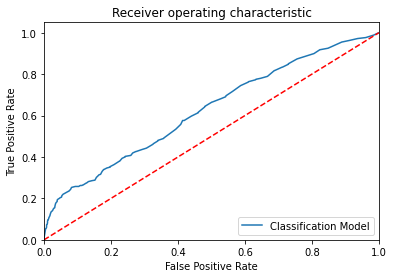

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[134 293]
 [158 915]]
Outcome values : 
 134 293 158 915
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.31      0.37       427
           0       0.76      0.85      0.80      1073

    accuracy                           0.70      1500
   macro avg       0.61      0.58      0.59      1500
weighted avg       0.67      0.70      0.68      1500

Accuracy : 69.9 %
Precision : 45.9 %
Recall : 31.4 %
F1 Score : 0.373
Specificity or True Negative Rate : 85.3 %
Balanced Accuracy : 58.4 %
MCC : 0.19
roc_auc_score: 0.583


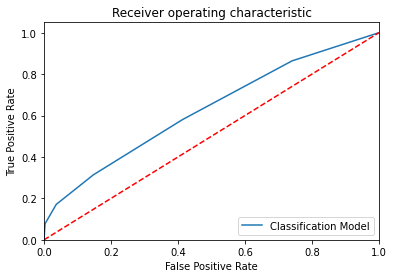

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[164 263]
 [291 782]]
Outcome values : 
 164 263 291 782
Classification report : 
               precision    recall  f1-score   support

           1       0.36      0.38      0.37       427
           0       0.75      0.73      0.74      1073

    accuracy                           0.63      1500
   macro avg       0.55      0.56      0.56      1500
weighted avg       0.64      0.63      0.63      1500

Accuracy : 63.1 %
Precision : 36.0 %
Recall : 38.4 %
F1 Score : 0.372
Specificity or True Negative Rate : 72.9 %
Balanced Accuracy : 55.6 %
MCC : 0.111
roc_auc_score: 0.556


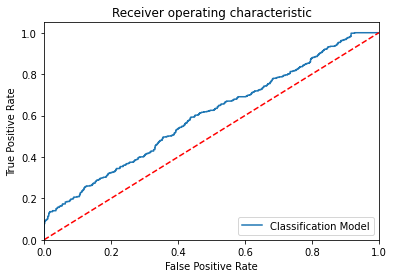

-----------------------------------------------------------------------------------------------------


In [28]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSM]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults1 = EMResults1.append(new_row, ignore_index=True)
    #---

In [29]:
EMResults1

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),71,356,19,1054,0.750,0.789,0.166,0.275,0.982,0.282,0.574284,0.574
1,DecisionTreeClassifier(),171,256,286,787,0.639,0.374,0.400,0.387,0.733,0.131,0.566963,0.566
2,"(DecisionTreeClassifier(max_features='auto', r...",112,315,104,969,0.721,0.519,0.262,0.348,0.903,0.213,0.582685,0.582
3,"(ExtraTreeClassifier(random_state=1622872010),...",122,305,154,919,0.694,0.442,0.286,0.347,0.856,0.166,0.571096,0.571
4,KNeighborsClassifier(),134,293,158,915,0.699,0.459,0.314,0.373,0.853,0.190,0.583283,0.584
5,"SVC(class_weight='balanced', probability=True,...",164,263,291,782,0.631,0.360,0.384,0.372,0.729,0.111,0.556436,0.556
